In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Load the dataset
file_path = 'SolarPrediction.csv'  # Adjust this path if needed
df = pd.read_csv(file_path)

# Convert 'TimeSunRise' and 'TimeSunSet' to datetime format and extract useful time-based features
df['TimeSunRise'] = pd.to_datetime(df['TimeSunRise'], format='%H:%M:%S').dt.time
df['TimeSunSet'] = pd.to_datetime(df['TimeSunSet'], format='%H:%M:%S').dt.time

# Create hour, minute, and second features from the 'Time' column
df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.hour
df['Minute'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.minute
df['Second'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.second

# Drop unnecessary columns (UNIXTime, Date, Time) and convert sunrise/sunset times into numerical features
df = df.drop(columns=['UNIXTime', 'Data', 'Time', 'TimeSunRise', 'TimeSunSet'])

# Prepare the dataset for training
X = df.drop(columns=['Radiation'])  # Features
y = df['Radiation']  # Target variable

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model performance
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R² Score: {r2}")


Mean Absolute Error (MAE): 37.394453410828994
R² Score: 0.9172864725316142


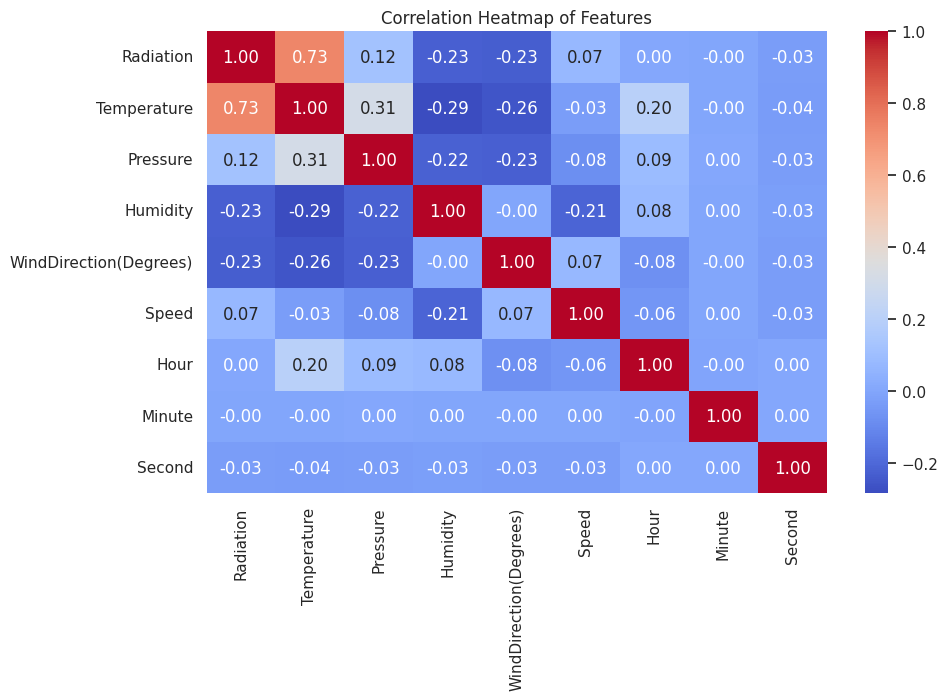

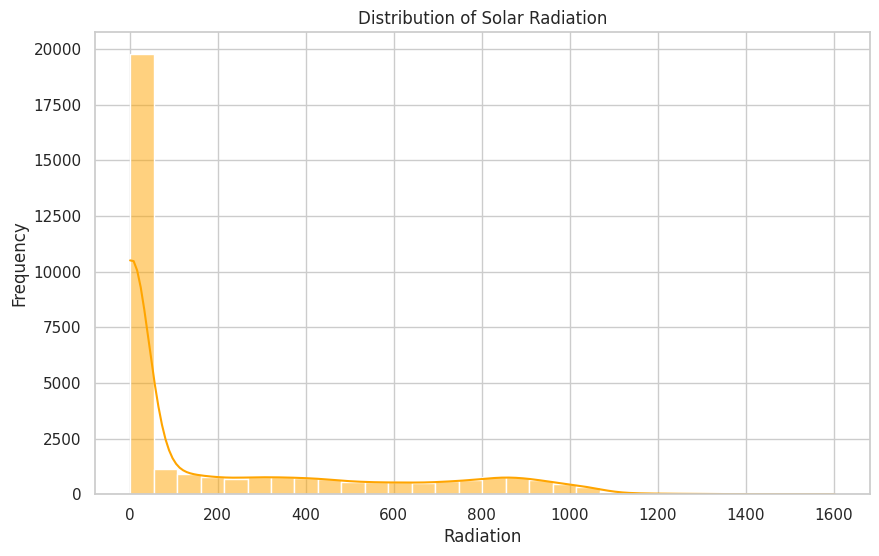

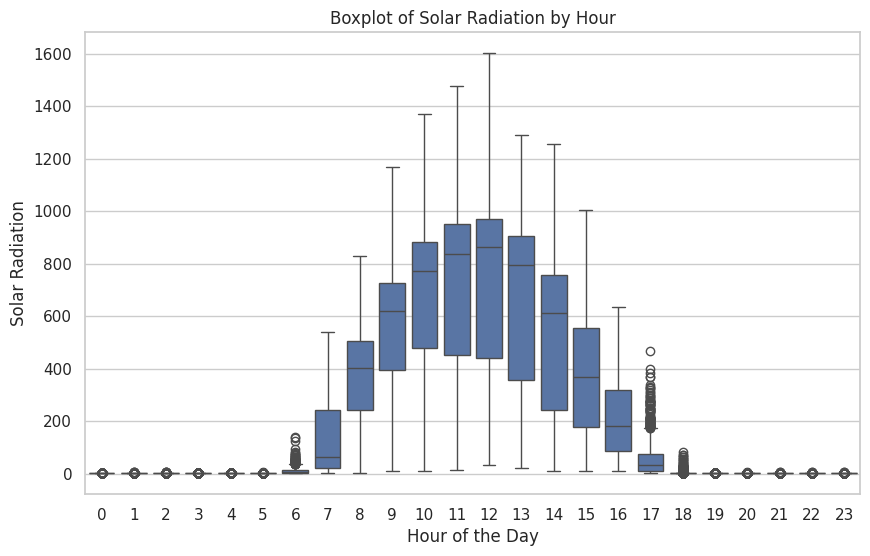

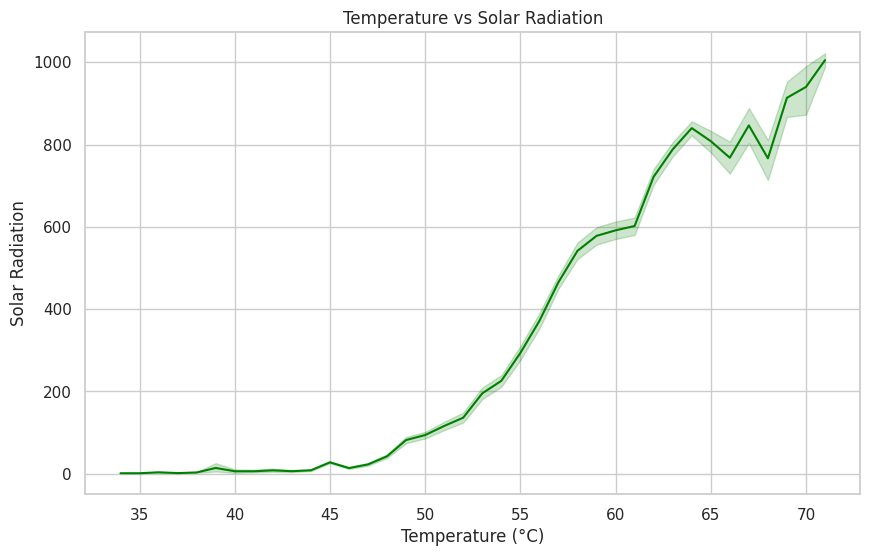

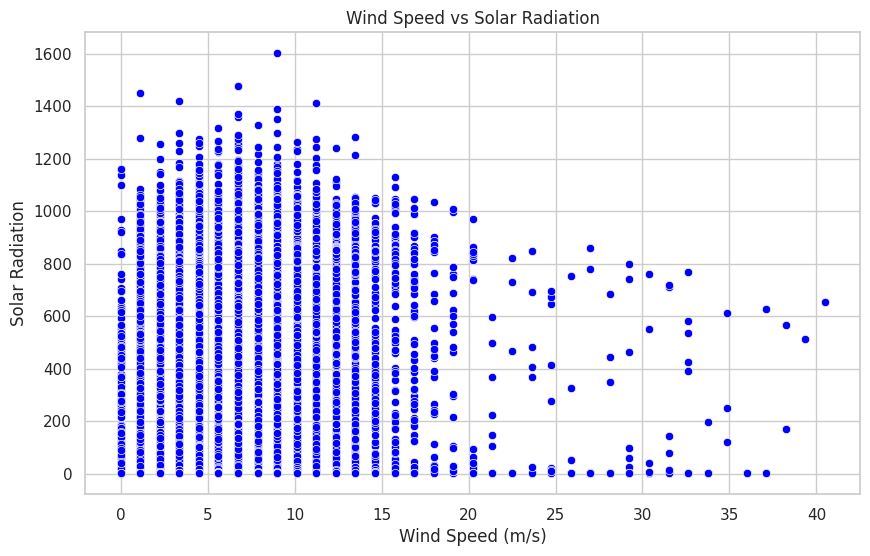

<Figure size 1000x600 with 0 Axes>

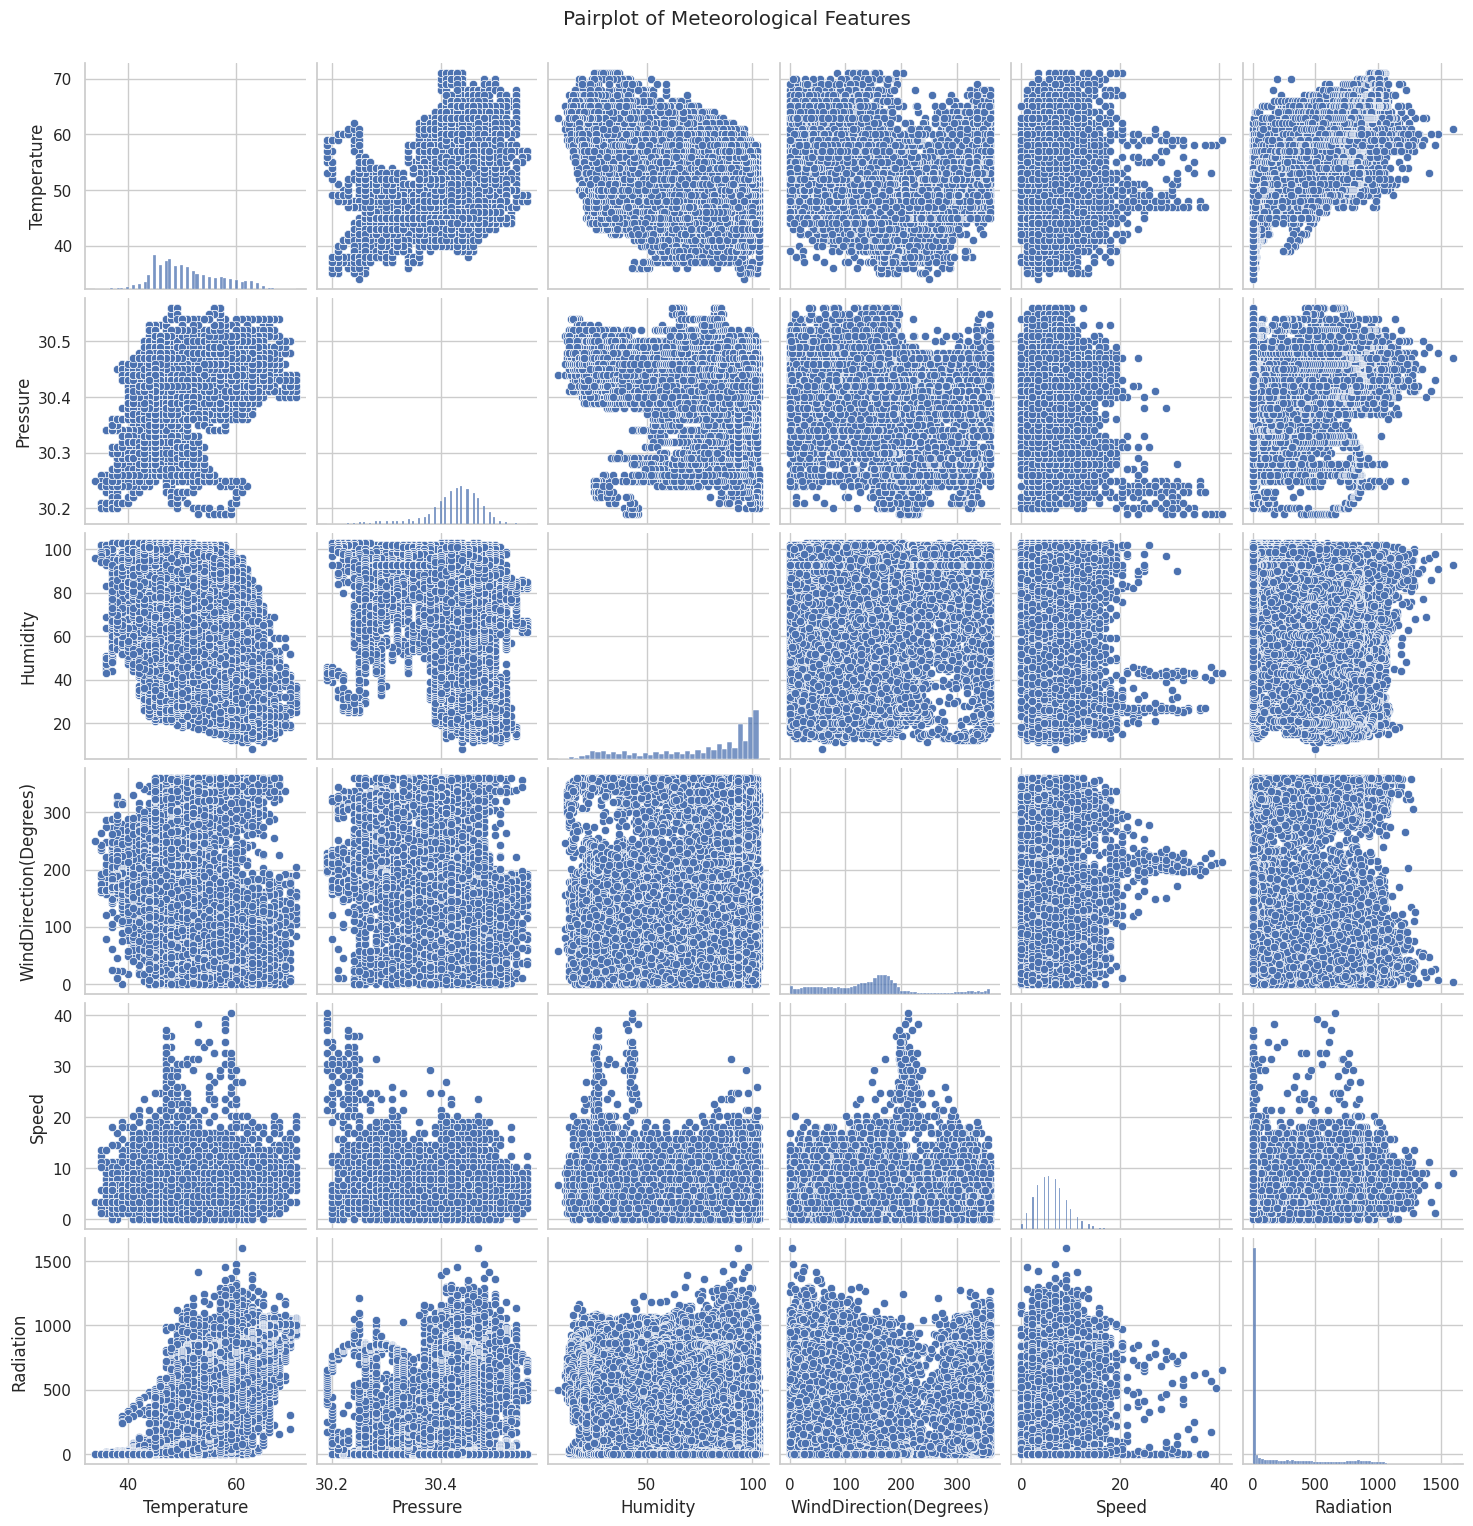

<ipython-input-3-bc7578bbe7ec>:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Hour', y='Radiation', data=hourly_avg_radiation, palette='coolwarm')


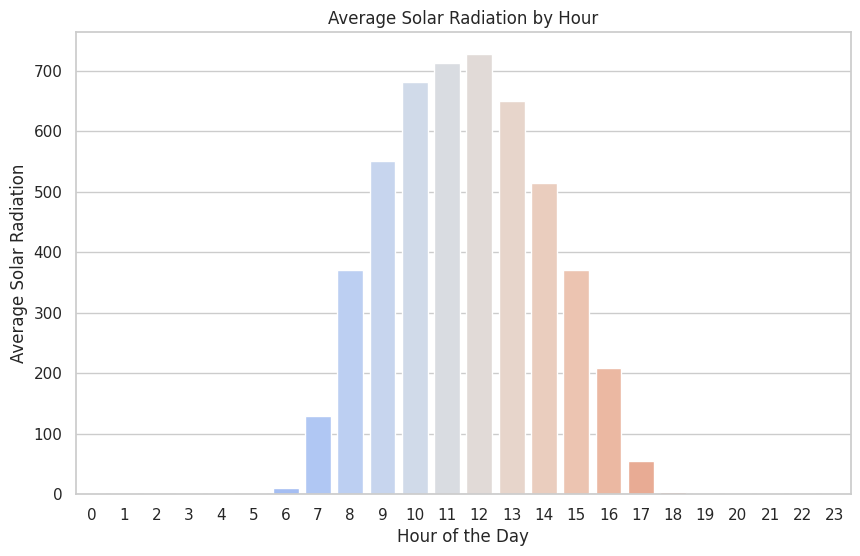

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a theme for the plots
sns.set_theme(style="whitegrid")

# 1. Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Features")
plt.show()

# 2. Distribution of Solar Radiation
plt.figure(figsize=(10, 6))
sns.histplot(df['Radiation'], bins=30, kde=True, color='orange')
plt.title("Distribution of Solar Radiation")
plt.xlabel("Radiation")
plt.ylabel("Frequency")
plt.show()

# 3. Boxplot of Radiation by Hour
plt.figure(figsize=(10, 6))
sns.boxplot(x='Hour', y='Radiation', data=df)
plt.title("Boxplot of Solar Radiation by Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Solar Radiation")
plt.show()

# 4. Line Plot of Temperature vs Solar Radiation
plt.figure(figsize=(10, 6))
sns.lineplot(x='Temperature', y='Radiation', data=df, color='green')
plt.title("Temperature vs Solar Radiation")
plt.xlabel("Temperature (°C)")
plt.ylabel("Solar Radiation")
plt.show()

# 5. Scatter Plot: Wind Speed vs Solar Radiation
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Speed', y='Radiation', data=df, color='blue')
plt.title("Wind Speed vs Solar Radiation")
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Solar Radiation")
plt.show()

# 6. Pair Plot of Meteorological Features
plt.figure(figsize=(10, 6))
sns.pairplot(df[['Temperature', 'Pressure', 'Humidity', 'WindDirection(Degrees)', 'Speed', 'Radiation']])
plt.suptitle("Pairplot of Meteorological Features", y=1.02)
plt.show()

# 7. Barplot: Average Solar Radiation by Hour
plt.figure(figsize=(10, 6))
hourly_avg_radiation = df.groupby('Hour')['Radiation'].mean().reset_index()
sns.barplot(x='Hour', y='Radiation', data=hourly_avg_radiation, palette='coolwarm')
plt.title("Average Solar Radiation by Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Solar Radiation")
plt.show()


In [4]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)


In [5]:
# Example of predicting solar radiation for new weather data
new_weather_data = {
    'Temperature': [30],
    'Pressure': [1015],
    'Humidity': [60],
    'WindDirection(Degrees)': [150],
    'Speed': [5],
    'Hour': [14],
    'Minute': [30],
    'Second': [0]
}

new_data_df = pd.DataFrame(new_weather_data)
predicted_radiation = rf_model.predict(new_data_df)

print(f"Predicted Solar Radiation: {predicted_radiation[0]}")


Predicted Solar Radiation: 250.56910000000008
